In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('/Users/gunnarfranko/Downloads/DS 5100/')
import montecarlo as FClasses

# Scenario 1: A 2-Headed Coin

### 1. 

In [2]:
coin1= FClasses.Die(['H', 'T'])
coin2 = FClasses.Die(['H', 'T'])
coin2.change_weight('H', 5.0)

#Creates Coins 1 and 2 and changes the weights of Coin 2

### 2. 

In [3]:
game1 = FClasses.Game([coin1, coin1, coin1])
game1.play(1000)
type(coin1._diedf)
#Creates game with fair coins and rolls it 1000 times

pandas.core.frame.DataFrame

### 3. 

In [4]:
game2 = FClasses.Game([coin1, coin2, coin2])
game2.play(1000)
#Creates next game and rolls it 1000 times

### 4./5.

In [5]:
game1an = FClasses.Analyzer(game1)
game2an = FClasses.Analyzer(game2)
game1freq = (game1an.jackpot()/1000)
game2freq = (game2an.jackpot()/1000)
#Uses Analyzer.jackpot() for each game, and divides it by the total number of rolls to get the relative frequency

### 6.

<AxesSubplot:title={'center':'Jackpot Frequencies'}, xlabel='Game', ylabel='Frequency'>

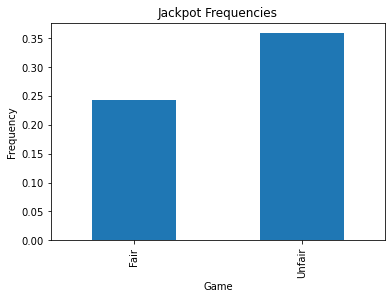

In [6]:
gamedf = pd.DataFrame({'Freq': [game1freq, game2freq]}, index=['Fair', 'Unfair'])
gamedf.plot.bar(title = 'Jackpot Frequencies', xlabel ='Game', ylabel='Frequency', legend = False)

# Scenario 2: A 6-Sided Die

### 1.

In [7]:
FDie = FClasses.Die(['1','2','3','4','5','6'])
T1Die = FClasses.Die(['1','2','3','4','5','6'])
T2Die = FClasses.Die(['1','2','3','4','5','6'])
T1Die.change_weight('6', 5.0)
T2Die.change_weight('1', 5.0)

#Creates the 3 die and changes the weight for the unfair die 

### 2.

In [8]:
fgame = FClasses.Game([FDie, FDie, FDie, FDie, FDie])
fgame.play(10000)
#Runs the game with all fair die 

### 3.

In [19]:
wgame = FClasses.Game([T1Die, T1Die, T2Die, FDie, FDie])
wgame.play(10000)
#Runs the game with the weighted die 

5

### 4.

<AxesSubplot:title={'center':'Jackpot Frequencies'}, xlabel='Game', ylabel='Frequency'>

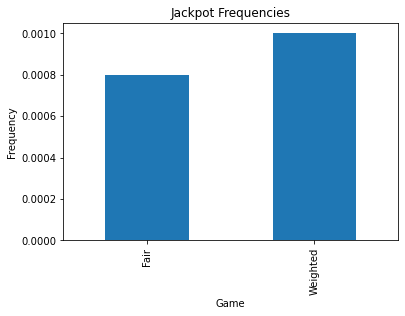

In [10]:
fgamean = FClasses.Analyzer(fgame)
wgamean = FClasses.Analyzer(wgame)
fgamefreq = (fgamean.jackpot()/10000)
wgamefreq = (wgamean.jackpot()/10000)

#Computes and saves the values for jackpot frequency for the two games

diegamedf = pd.DataFrame({'Freq': [fgamefreq, wgamefreq]}, index=['Fair', 'Weighted'])
diegamedf.plot.bar(title = 'Jackpot Frequencies', xlabel ='Game', ylabel='Frequency', legend = False)


### 5.

In [11]:
fcombodf = fgamean.combo()
wcombodf = wgamean.combo()

In [12]:
fdf10 = fcombodf.head(10).reset_index()
wdf10 = wcombodf.head(10).reset_index()
fdf10['freq'] = fdf10['n']/10000
wdf10['freq'] = wdf10['n']/10000
#This loads in the combo df, resets the index and adds a column with the frequency for each combo 

<AxesSubplot:title={'center':'Fair Jackpot Frequencies'}, xlabel='Combo', ylabel='Frequency'>

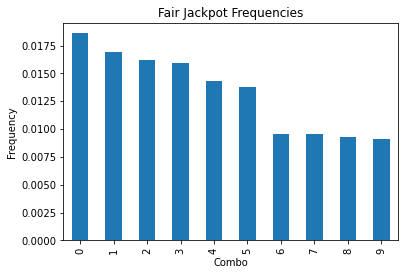

In [13]:
fdf10['freq'].plot.bar(title = 'Fair Jackpot Frequencies', xlabel ='Combo', ylabel='Frequency', legend = False)

<AxesSubplot:title={'center':'Weighted Jackpot Frequencies'}, xlabel='Combo', ylabel='Frequency'>

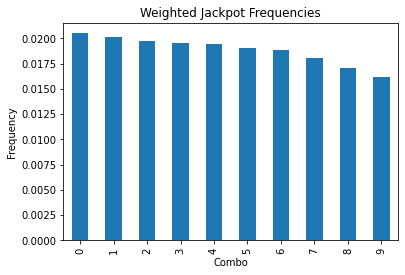

In [14]:
wdf10['freq'].plot.bar(title = 'Weighted Jackpot Frequencies', xlabel ='Combo', ylabel='Frequency', legend = False)

# Scenario 3: Letters of the Roman Alphabet

### 1.

In [15]:
atable = pd.read_csv('letter-freqs.csv', names=['Letters','Weights'], sep='\t')
alphabet = FClasses.Die(atable['Letters'])
for i in range(len(atable)):
    alphabet.change_weight(str(atable['Letters'][i]), float(atable['Weights'][i]))


### 2.

In [16]:
alphagame = FClasses.Game([alphabet, alphabet, alphabet, alphabet, alphabet])
alphagame.play(1000)

### 3. 

In [17]:
alphan = FClasses.Analyzer(alphagame)
alphcombo = alphan.combo()

English-Like Words = 44

### 4.

Frequency of Like-Words = 44/996 = 0.04417670682730924